# Social Defeat Dopamine Analysis

DA data

In [1]:
import os
import sys

PROJECT_ROOT = os.path.abspath(os.path.join(os.getcwd(), '..'))
sys.path.append(PROJECT_ROOT)

from trial_class import *
from experiment_class import Experiment
from bouts_extension import *
from sd_extension import *

In [2]:
nac_experiment_path = r"C:\Users\alber\OneDrive\Desktop\PC_Lab\Photometry\Pilot_2\Combined_Cohorts\Defeat\nac"
nac_csv_base_path = r"C:\Users\alber\OneDrive\Desktop\PC_Lab\Photometry\Pilot_2\Combined_Cohorts\Defeat\nac_csvs"
nac_color = '#15616F'

mpfc_experiment_path = r"C:\Users\alber\OneDrive\Desktop\PC_Lab\Photometry\Pilot_2\Combined_Cohorts\Defeat\mpfc"
mpfc_csv_base_path = r"C:\Users\alber\OneDrive\Desktop\PC_Lab\Photometry\Pilot_2\Combined_Cohorts\Defeat\mpfc_csvs"
mpfc_color = '#FFAF00'

# experiment_path = r"C:\Users\alber\OneDrive\Desktop\PC_Lab\Photometry\Pilot_2\Combined_Cohorts\Defeat\all_mice"
# csv_base_path = r"C:\Users\alber\OneDrive\Desktop\PC_Lab\Photometry\Pilot_2\Combined_Cohorts\Defeat\all_mice_csvs"



In [3]:
bout_definitions = [
    {'prefix': 'bully', 'introduced': 'Subject_Introduced', 'removed': 'Subject_Removed'}
]

In [4]:
# groups csv + experiment data into one variable
nac_exp = Experiment(nac_experiment_path, nac_csv_base_path)

mpfc_exp = Experiment(mpfc_experiment_path, mpfc_csv_base_path)

# # batch process the data, removing the specified time segments for subjects
# nac_exp.batch_process_exponential()
# mpfc_exp.batch_process_exponential()

nac_exp.default_batch_process()
mpfc_exp.default_batch_process()

Found Synapse note file: C:\Users\alber\OneDrive\Desktop\PC_Lab\Photometry\Pilot_2\Combined_Cohorts\Defeat\nac\n5-240916-092748\Notes.txt
read from t=0s to t=868.05s
Found Synapse note file: C:\Users\alber\OneDrive\Desktop\PC_Lab\Photometry\Pilot_2\Combined_Cohorts\Defeat\nac\n7-240916-113157\Notes.txt
read from t=0s to t=862.35s
Found Synapse note file: C:\Users\alber\OneDrive\Desktop\PC_Lab\Photometry\Pilot_2\Combined_Cohorts\Defeat\nac\nn1-250223-100216\Notes.txt
read from t=0s to t=866.05s
Found Synapse note file: C:\Users\alber\OneDrive\Desktop\PC_Lab\Photometry\Pilot_2\Combined_Cohorts\Defeat\nac\nn2-250223-102714\Notes.txt
read from t=0s to t=861.85s
Found Synapse note file: C:\Users\alber\OneDrive\Desktop\PC_Lab\Photometry\Pilot_2\Combined_Cohorts\Defeat\nac\nn3-250223-105155\Notes.txt
read from t=0s to t=864.35s
Found Synapse note file: C:\Users\alber\OneDrive\Desktop\PC_Lab\Photometry\Pilot_2\Combined_Cohorts\Defeat\nac\nn4-250223-111644\Notes.txt
read from t=0s to t=861.25s


### Peak standard z-score

In [5]:
nac_exp.group_extract_manual_annotations(bout_definitions=bout_definitions, first_only = False)

mpfc_exp.group_extract_manual_annotations(bout_definitions=bout_definitions, first_only = False)

# total_avg_bout_duration = metadata_df["Average Bout Duration"].mean()
# print(f"Total Average Bout Duration: {total_avg_bout_duration:.4f}")
# Proceed with DA metric computation after all files are processed
nac_exp.compute_all_da_metrics(use_max_length=True,
                                  max_bout_duration=9, #otal_avg_bout_duration
                                  mode='standard')

mpfc_exp.compute_all_da_metrics(use_max_length=True,
                                  max_bout_duration=9, #otal_avg_bout_duration
                                  mode='standard')

Processing behaviors for n5-240916-092748...
Processing behaviors for n7-240916-113157...
Processing behaviors for nn1-250223-100216...
Processing behaviors for nn2-250223-102714...
Processing behaviors for nn3-250223-105155...
Processing behaviors for nn4-250223-111644...
Processing behaviors for nn5-250223-114717...
Processing behaviors for nn6-250223-120921...
Processing behaviors for nn7-250223-123200...
Processing behaviors for nn8-250223-125722...
Processing behaviors for p1-240510-082326...
Processing behaviors for p2-240510-094249...
Processing behaviors for p3-240513-064912...
Processing behaviors for p5-240916-090016...
Processing behaviors for p6-240916-095652...
Processing behaviors for p7-240916-110418...
Processing behaviors for p8-240916-115836...
Processing behaviors for pp1-250223-093419...
Processing behaviors for pp2-250223-082553...
Processing behaviors for pp3-250223-084945...
Processing behaviors for pp4-250223-091227...
Processing behaviors for pp5-250223-132705.

In [6]:
nac_exp_da_dict = get_trial_dataframes(nac_exp)
mpfc_exp_da_dict = get_trial_dataframes(mpfc_exp)

In [7]:
desired_bouts = ['bully-1']

nac_da_metadata_df = create_da_metrics_dataframe(nac_exp_da_dict, behavior="Defeat", desired_bouts=desired_bouts)

mpfc_da_metadata_df = create_da_metrics_dataframe(mpfc_exp_da_dict, behavior="Defeat", desired_bouts=desired_bouts)

In [8]:
nac_da_metadata_df

,Subject,Bout,Behavior,AUC,Max Peak,Mean Z-score
0,n5,bully-1,Defeat,-0.227757,1.415895,0.053513
1,n7,bully-1,Defeat,-0.503610,0.439525,-0.249294
2,nn1,bully-1,Defeat,-2.819047,0.699193,-0.388893
3,nn2,bully-1,Defeat,-0.515675,1.789847,-0.062292
4,nn3,bully-1,Defeat,-0.625440,1.663044,-0.089250
5,nn4,bully-1,Defeat,-2.260728,1.039329,-0.283465
6,nn5,bully-1,Defeat,2.908034,2.004233,0.569842
7,nn6,bully-1,Defeat,1.576855,1.840113,0.460946
8,nn7,bully-1,Defeat,1.547616,1.920827,0.412638
9,nn8,bully-1,Defeat,0.587723,0.951695,0.146310


Comparing mice

Stats

In [9]:
# import numpy as np
# import pandas as pd
# from scipy.stats import ttest_ind

# # --- 1) Build a single‐metric DataFrame for each region ---
# # Suppose da_metadata_df has columns ['Subject','Bout','Behavior','AUC',…]
# # and contains both NAc and mPFC animals (you can merge them into one df first).

# # Add a “Region” column by looking at your subject naming convention:
# # e.g. subject names starting with 'n' → NAc, 'p' → mPFC
# da_metadata_df['Region'] = da_metadata_df['Subject'].str[0].map({
#     'n':'NAc',
#     'p':'mPFC'
# })

# # Filter down to first defeat bout, and defeat behavior
# df1 = da_metadata_df.query("Bout=='bully-1' and Behavior=='Defeat'")

# # Now split:
# nac_auc  = df1 .loc[df1.Region=='NAc','AUC'].values
# mpfc_auc = df1 .loc[df1.Region=='mPFC','AUC'].values

# # --- 2) Independent‐samples t‐test ---
# t_stat, p_val = ttest_ind(nac_auc, mpfc_auc,
#                           nan_policy='omit',
#                           equal_var=False)
# print(f"t = {t_stat:.2f}, p = {p_val:.5f}")

# # --- 3) Cohen’s d for independent samples ---
# def cohens_d(x, y):
#     nx, ny = len(x), len(y)
#     # pooled standard deviation
#     dof = nx + ny - 2
#     s_pooled = np.sqrt(
#         ((nx-1)*np.nanvar(x, ddof=1) + (ny-1)*np.nanvar(y, ddof=1))
#         / dof
#     )
#     return (np.nanmean(x) - np.nanmean(y)) / s_pooled

# d = cohens_d(nac_auc, mpfc_auc)
# print(f"Cohen’s d = {d:.2f}")


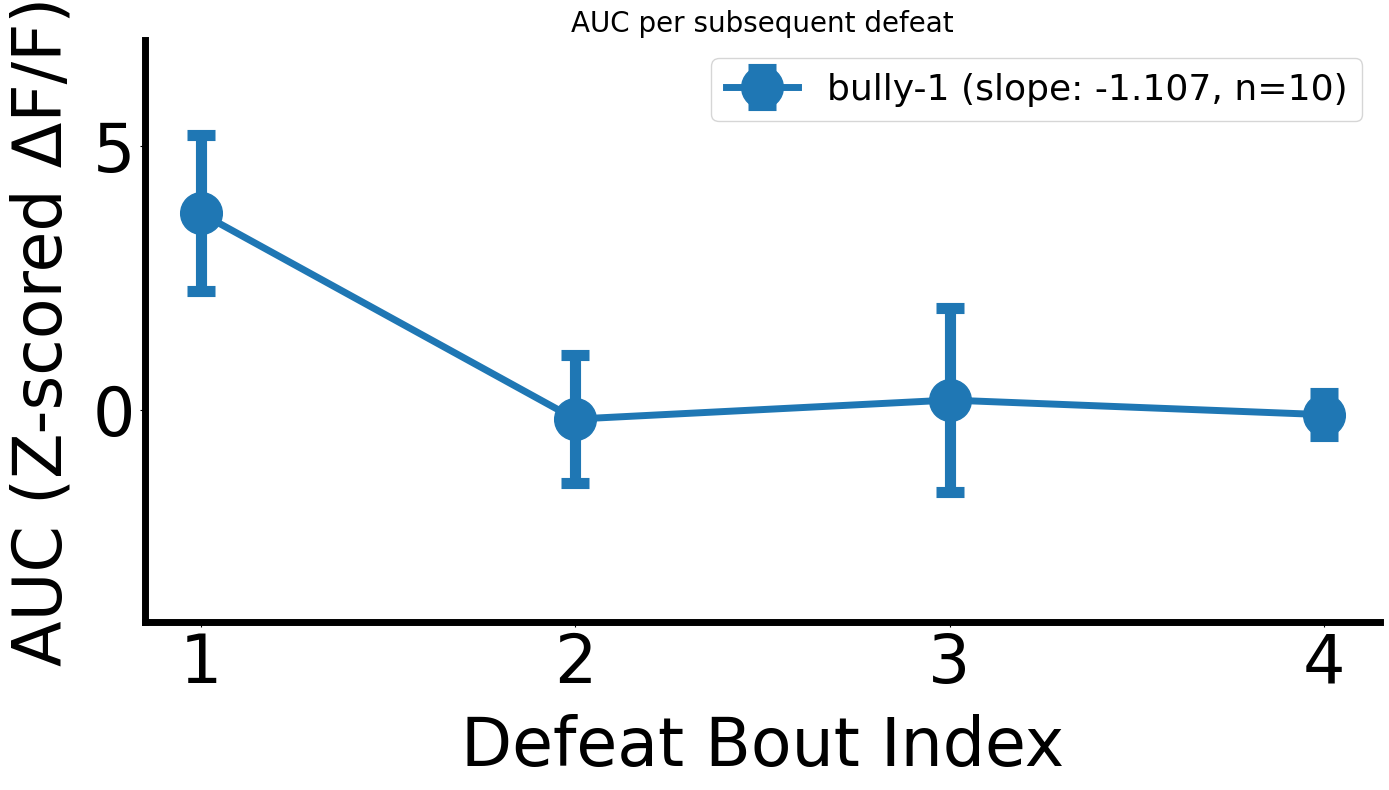


=== Computed Metric (SLOPE): ===
Bout: bully-1, slope = -1.107


,Bout,BehaviorIndex,SubjectCount,AvgPeak,StdPeak,SEM
0,bully-1,1,10,3.725899,4.673147,1.477779
1,bully-1,2,10,-0.167662,3.820241,1.208066
2,bully-1,3,10,0.192581,5.500122,1.739291
3,bully-1,4,10,-0.083837,1.285195,0.406414


In [10]:
plot_peak_for_subsequent_behaviors(nac_exp_da_dict, 
                                   selected_bouts=["bully-1"], 
                                   behavior="Defeat", 
                                   n_subsequent_behaviors=4,
                                   peak_col='AUC',
                                   xlabel="Defeat Bout Index",
                                    ylabel="AUC (Z-scored ΔF/F)",
                                    plot_title="AUC per subsequent defeat",
                                    ylim = (-4, 7),
                                    custom_colors=None,
                                    save_path=None)
                                    # figsize=(14,8),
                                    # save_path=r"C:\Users\alber\OneDrive\Documents\GitHub\Fiber_Photometry\Social_Defeat\mPFC_defeat.png")


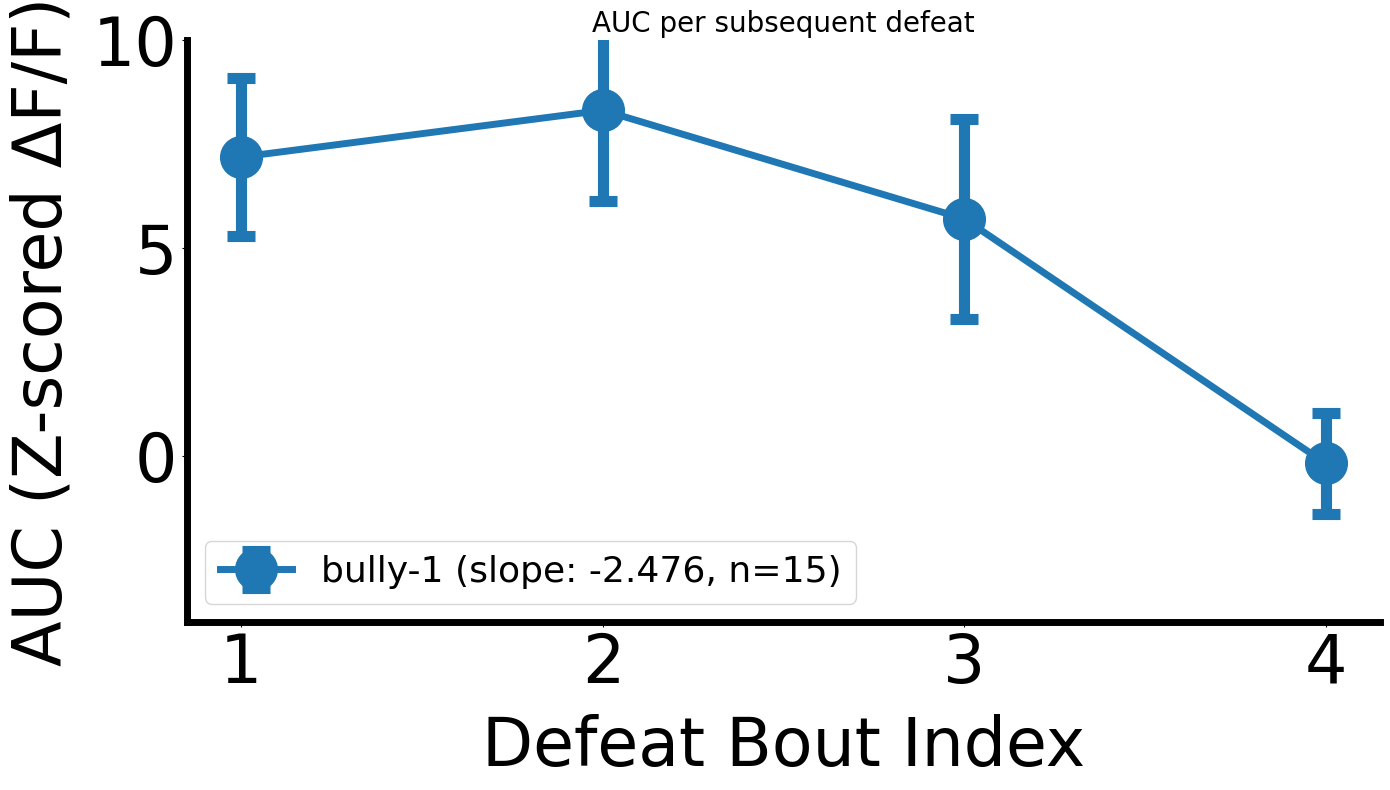


=== Computed Metric (SLOPE): ===
Bout: bully-1, slope = -2.476


,Bout,BehaviorIndex,SubjectCount,AvgPeak,StdPeak,SEM
0,bully-1,1,15,7.189949,7.339123,1.894953
1,bully-1,2,15,8.315213,8.496223,2.193715
2,bully-1,3,14,5.700726,8.987987,2.402140
3,bully-1,4,14,-0.191150,4.545043,1.214714


In [11]:
plot_peak_for_subsequent_behaviors(mpfc_exp_da_dict, 
                                   selected_bouts=["bully-1"], 
                                   behavior="Defeat", 
                                   n_subsequent_behaviors=4,
                                   peak_col='AUC',
                                   xlabel="Defeat Bout Index",
                                    ylabel="AUC (Z-scored ΔF/F)",
                                    plot_title="AUC per subsequent defeat",
                                    ylim = (-4, 10),
                                    custom_colors=None,
                                    save_path=None)
                                    # figsize=(14,8),
                                    # save_path=r"C:\Users\alber\OneDrive\Documents\GitHub\Fiber_Photometry\Social_Defeat\mPFC_defeat.png")


In [12]:
nac_exp.reset_all_behaviors()
nac_exp.group_extract_manual_annotations(bout_definitions=bout_definitions, first_only = False)


Processing behaviors for n5-240916-092748...
Processing behaviors for n7-240916-113157...
Processing behaviors for nn1-250223-100216...
Processing behaviors for nn2-250223-102714...
Processing behaviors for nn3-250223-105155...
Processing behaviors for nn4-250223-111644...
Processing behaviors for nn5-250223-114717...
Processing behaviors for nn6-250223-120921...
Processing behaviors for nn7-250223-123200...
Processing behaviors for nn8-250223-125722...


In [13]:
mpfc_exp.reset_all_behaviors()
mpfc_exp.group_extract_manual_annotations(bout_definitions=bout_definitions, first_only = False)


Processing behaviors for p1-240510-082326...
Processing behaviors for p2-240510-094249...
Processing behaviors for p3-240513-064912...
Processing behaviors for p5-240916-090016...
Processing behaviors for p6-240916-095652...
Processing behaviors for p7-240916-110418...
Processing behaviors for p8-240916-115836...
Processing behaviors for pp1-250223-093419...
Processing behaviors for pp2-250223-082553...
Processing behaviors for pp3-250223-084945...
Processing behaviors for pp4-250223-091227...
Processing behaviors for pp5-250223-132705...
Processing behaviors for pp6-250223-135048...
Processing behaviors for pp7-250223-141336...
Processing behaviors for pp8-250223-143545...


In [14]:
nac_exp.compute_all_event_induced_DA(pre_time=4, post_time=10)
mpfc_exp.compute_all_event_induced_DA(pre_time=4, post_time=10)

Computing event-induced DA for trial n5-240916-092748 ...
Computing event-induced DA for trial n7-240916-113157 ...
Computing event-induced DA for trial nn1-250223-100216 ...
Computing event-induced DA for trial nn2-250223-102714 ...
Computing event-induced DA for trial nn3-250223-105155 ...
Computing event-induced DA for trial nn4-250223-111644 ...
Computing event-induced DA for trial nn5-250223-114717 ...
Computing event-induced DA for trial nn6-250223-120921 ...
Computing event-induced DA for trial nn7-250223-123200 ...
Computing event-induced DA for trial nn8-250223-125722 ...
Computing event-induced DA for trial p1-240510-082326 ...
Computing event-induced DA for trial p2-240510-094249 ...
Computing event-induced DA for trial p3-240513-064912 ...
Computing event-induced DA for trial p5-240916-090016 ...
Computing event-induced DA for trial p6-240916-095652 ...
Computing event-induced DA for trial p7-240916-110418 ...
Computing event-induced DA for trial p8-240916-115836 ...
Comput

In [15]:
# experiment.trials['n7-240916-113157'].behaviors.head()

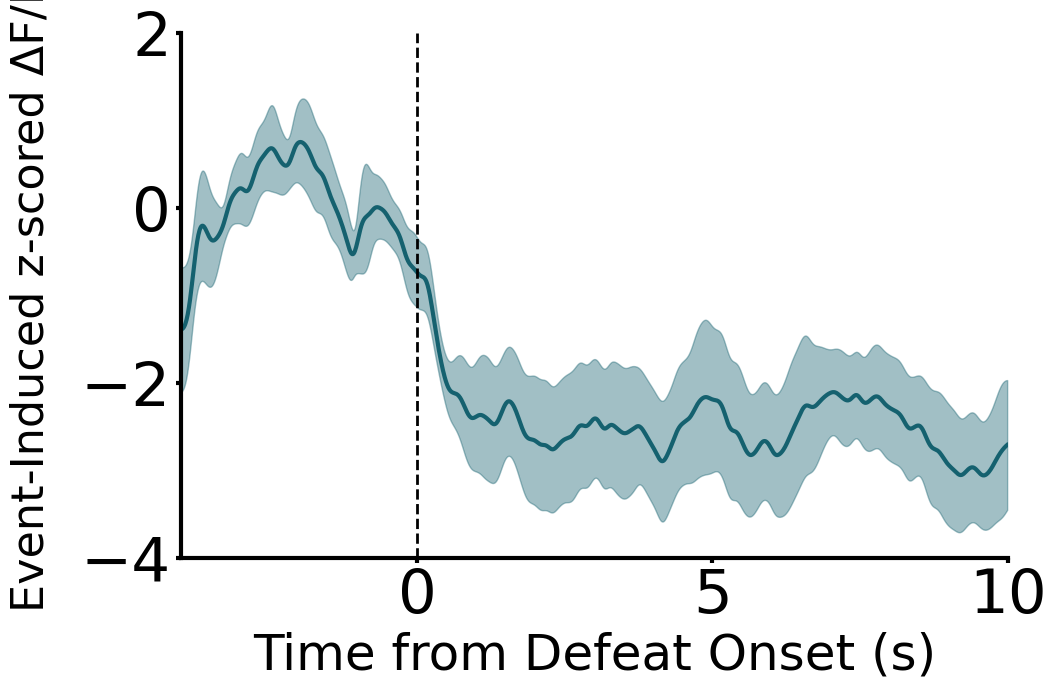

{'common_time_axis': array([-4.  , -3.99, -3.98, ...,  9.97,  9.98,  9.99]),
 'mean_trace': array([-1.39054947, -1.38948564, -1.38714484, ..., -2.72283399,
        -2.71660625, -2.71082175]),
 'sem_trace': array([0.71604039, 0.71289236, 0.70910154, ..., 0.75178807, 0.74716898,
        0.74199138]),
 'n_trials': 10,
 'subject_ids': ['n5',
  'n7',
  'nn1',
  'nn2',
  'nn3',
  'nn4',
  'nn5',
  'nn6',
  'nn7',
  'nn8']}

In [16]:
plot_average_defeat_bout_psth(
    experiment=nac_exp,
    nth_defeat=1,
    save=False,
    # save_path= r"Social_Defeat\Social_Defeat_graphsplots/DefeatBout1_Average.png",
    y_min=-4, 
    y_max=2,
    brain_region=nac_color
)


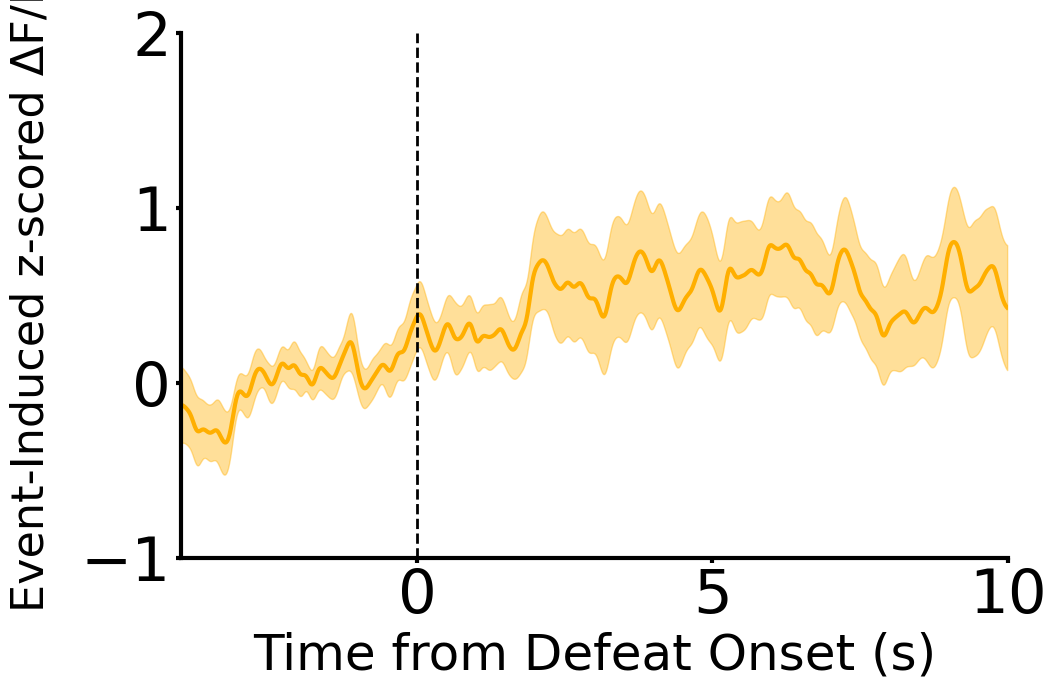

{'common_time_axis': array([-4.  , -3.99, -3.98, ...,  9.97,  9.98,  9.99]),
 'mean_trace': array([-0.13122052, -0.12868916, -0.12831338, ...,  0.43849346,
         0.43389525,  0.43010782]),
 'sem_trace': array([0.22194604, 0.21901927, 0.21672688, ..., 0.35448296, 0.35587595,
        0.35723079]),
 'n_trials': 15,
 'subject_ids': ['p1',
  'p2',
  'p3',
  'p5',
  'p6',
  'p7',
  'p8',
  'pp1',
  'pp2',
  'pp3',
  'pp4',
  'pp5',
  'pp6',
  'pp7',
  'pp8']}

In [17]:
plot_average_defeat_bout_psth(
    experiment=mpfc_exp,
    nth_defeat=1,
    save=False,
    # save_path= r"Social_Defeat\Social_Defeat_graphsplots/DefeatBout1_Average.png",
    y_min=-1, 
    y_max=2,
    brain_region=mpfc_color
)


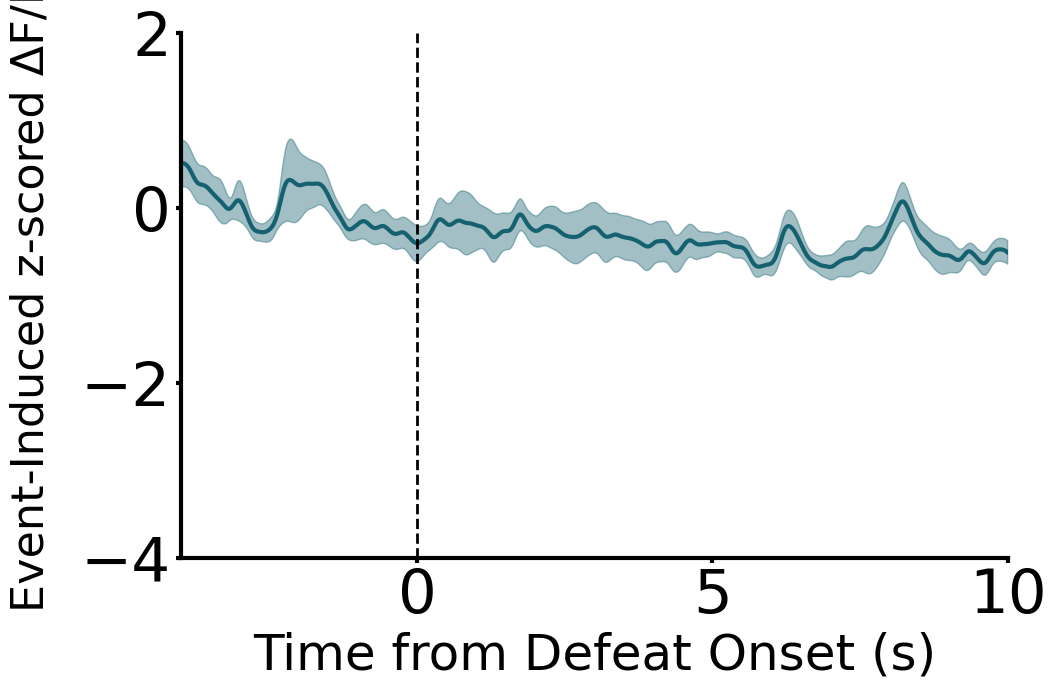

{'common_time_axis': array([-4.  , -3.99, -3.98, ...,  9.97,  9.98,  9.99]),
 'mean_trace': array([ 0.51451878,  0.5139748 ,  0.51348231, ..., -0.49375522,
        -0.49893406, -0.50481839]),
 'sem_trace': array([0.26613493, 0.26569777, 0.26513571, ..., 0.13399791, 0.13352774,
        0.13277813]),
 'n_trials': 10,
 'subject_ids': ['n5',
  'n7',
  'nn1',
  'nn2',
  'nn3',
  'nn4',
  'nn5',
  'nn6',
  'nn7',
  'nn8']}

In [18]:
plot_average_defeat_bout_psth(
    experiment=nac_exp,
    nth_defeat=4,
    save=False,
    # save_path= r"Social_Defeat\Social_Defeat_graphsplots/DefeatBout1_Average.png",
    y_min=-4, 
    y_max=2,
    brain_region=nac_color
)


Subjects missing 4-th defeat bout: pp2


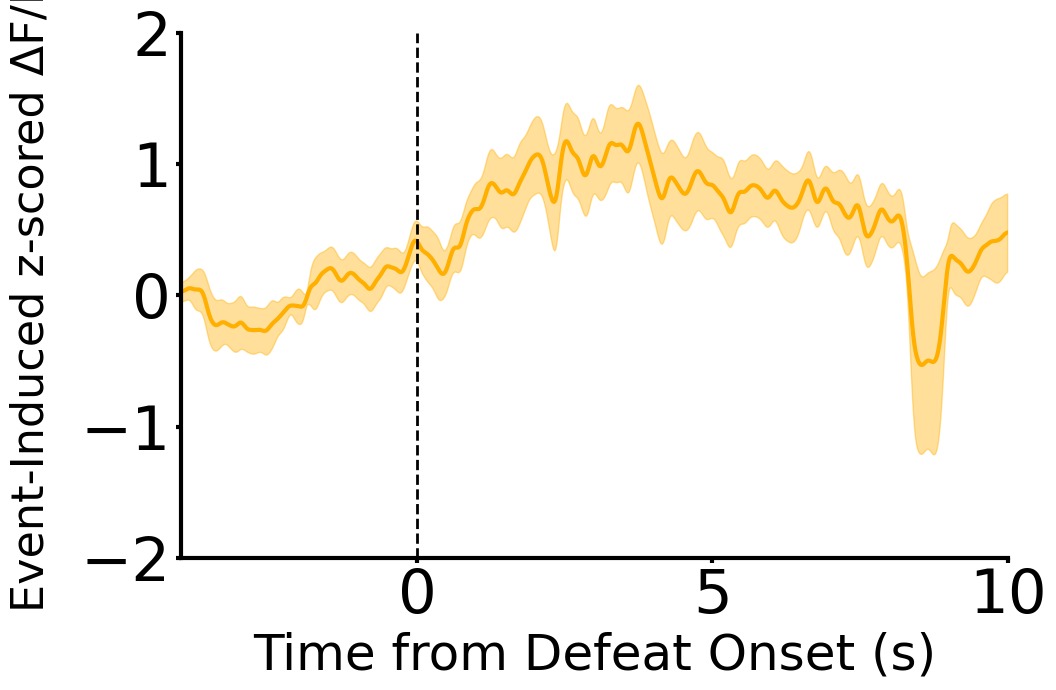

{'common_time_axis': array([-4.  , -3.99, -3.98, ...,  9.97,  9.98,  9.99]),
 'mean_trace': array([0.01901986, 0.02330805, 0.02680682, ..., 0.47400036, 0.47615533,
        0.47759703]),
 'sem_trace': array([0.07550112, 0.07575961, 0.07591572, ..., 0.30006027, 0.29878211,
        0.29753715]),
 'n_trials': 14,
 'subject_ids': ['p1',
  'p2',
  'p3',
  'p5',
  'p6',
  'p7',
  'p8',
  'pp1',
  'pp3',
  'pp4',
  'pp5',
  'pp6',
  'pp7',
  'pp8']}

In [19]:
plot_average_defeat_bout_psth(
    experiment=mpfc_exp,
    nth_defeat=4,
    save=False,
    # save_path= r"Social_Defeat\Social_Defeat_graphsplots/DefeatBout1_Average.png",
    y_min=-2, 
    y_max=2,
    brain_region=mpfc_color
)


In [20]:
import numpy as np
import matplotlib.pyplot as plt
import os

def plot_all_defeat_bouts_psth(
    experiment,
    save_path=None,
    save=False,
    bin_size=100,
    y_min=-5,
    y_max=3,
    brain_region=None
):
    """
    Average & plot event‐induced DA for *all* Defeat bouts across all trials.

    Parameters
    ----------
    experiment : Experiment
        Your experiment object, with .trials each having a .behaviors DataFrame.
    save_path : str or None
        Where to save the figure (including filename). Required if save=True.
    save : bool
        If True, saves the figure to disk.
    bin_size : int
        Downsampling factor (passes through experiment.downsample_data if available).
    y_min, y_max : float
        y‐axis limits.
    brain_region : str
        Hex color for the trace. Defaults to mPFC‐gold if None.
    """
    trace_color = brain_region if brain_region is not None else "#FFAF00"
    all_traces = []
    missing = []

    # 1) collect every Defeat bout trace
    for trial in experiment.trials.values():
        if getattr(trial, "behaviors", None) is None or trial.behaviors.empty:
            missing.append(trial.subject_name)
            continue

        df_def = trial.behaviors[trial.behaviors["Behavior"] == "Defeat"]
        if df_def.empty:
            missing.append(trial.subject_name)
            continue

        # for each defeat event in this trial
        for _, row in df_def.iterrows():
            tz = row.get("Relative_Time_Axis", None)
            tzs = row.get("Relative_Zscore", None)
            if tz is None or tzs is None:
                continue
            all_traces.append(np.array(tzs))

    if missing:
        print("Skipped (no defeat bouts):", ", ".join(set(missing)))

    if not all_traces:
        print("No defeat‐bout traces found.")
        return None

    # 2) assume all Relative_Time_Axis are the same across events
    time_axis = np.array(df_def.iloc[0]["Relative_Time_Axis"])
    stack = np.vstack(all_traces)
    mean_trace = stack.mean(axis=0)
    sem_trace  = stack.std(axis=0) / np.sqrt(stack.shape[0])

    # 3) optional downsample
    if hasattr(experiment, "downsample_data"):
        mean_trace, time_ds = experiment.downsample_data(mean_trace, time_axis, bin_size)
        sem_trace, _    = experiment.downsample_data(sem_trace,  time_axis, bin_size)
    else:
        time_ds = time_axis

    # 4) plot
    plt.figure(figsize=(14, 7))
    plt.plot(time_ds, mean_trace, color=trace_color, lw=3, label="Mean Defeat DA")
    plt.fill_between(time_ds,
                     mean_trace - sem_trace,
                     mean_trace + sem_trace,
                     color=trace_color, alpha=0.4,
                     label="SEM")
    plt.axvline(0, color="k", linestyle="--", lw=2)

    plt.xlabel("Time from Defeat Onset (s)", fontsize=24)
    plt.ylabel("Event‐Induced z‐scored ΔF/F", fontsize=24)
    plt.xlim(time_ds.min(), time_ds.max())
    plt.ylim(y_min, y_max)

    ax = plt.gca()
    ax.spines["top"].set_visible(False)
    ax.spines["right"].set_visible(False)
    ax.tick_params(labelsize=16, width=2)
    plt.xticks(fontsize=18)
    plt.yticks(fontsize=18)
    plt.legend(fontsize=16)

    plt.tight_layout()

    if save:
        if save_path is None:
            raise ValueError("save_path must be set if save=True")
        os.makedirs(os.path.dirname(save_path), exist_ok=True)
        plt.savefig(save_path, dpi=300, bbox_inches="tight", transparent=True)

    plt.show()

    return {
        "time_axis": time_ds,
        "mean_trace": mean_trace,
        "sem_trace": sem_trace,
        "n_events": stack.shape[0]
    }


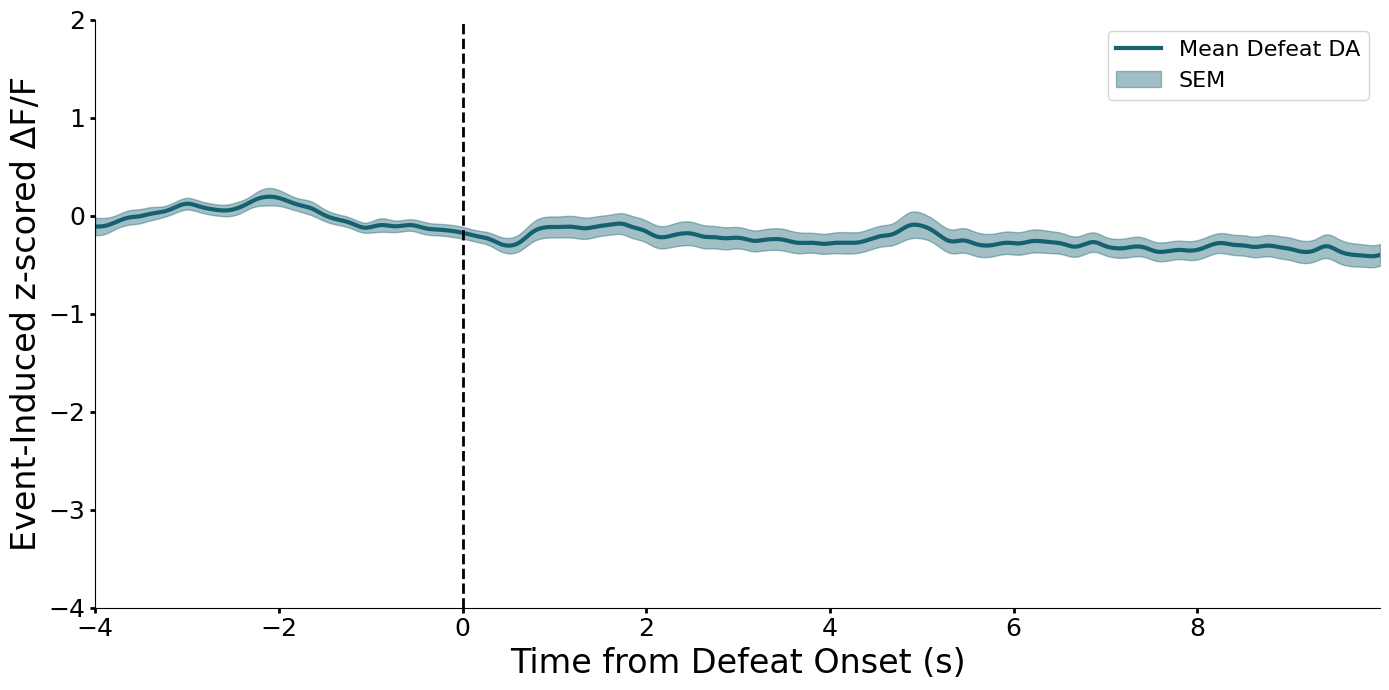

128 total defeat bouts averaged


In [21]:
res = plot_all_defeat_bouts_psth(
    experiment=nac_exp,
    save=False,
    y_min=-4, 
    y_max=2,
    brain_region=nac_color
)
print(res["n_events"], "total defeat bouts averaged")


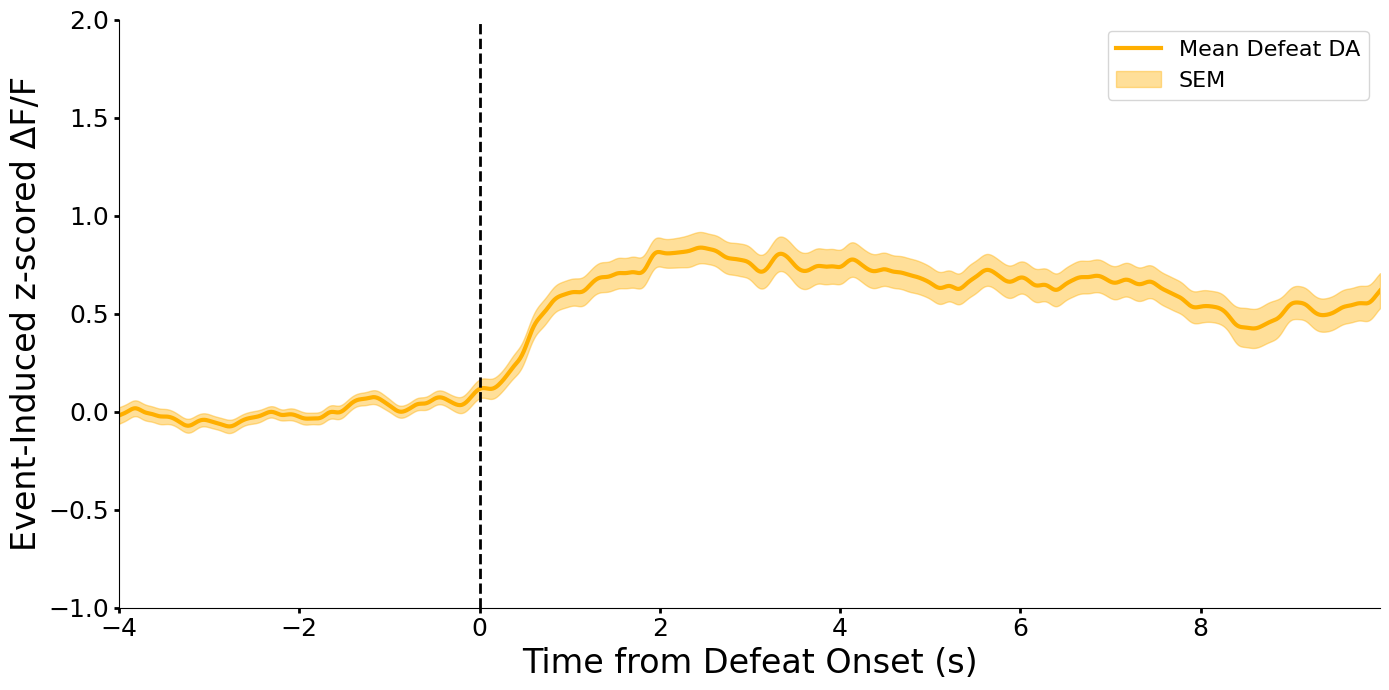

164 total defeat bouts averaged


In [23]:
res = plot_all_defeat_bouts_psth(
    experiment=mpfc_exp,
    save=False,
    y_min=-1, 
    y_max=2,
    brain_region=mpfc_color
)
print(res["n_events"], "total defeat bouts averaged")
